## Tutorial de Pandas
El siguiente ejemplo tiene por objetivo ilustrar algunas funcionalidades de **Pandas**. Para esto considera una base de datos de estudiantes con 4 asignaturas y $notas \in [0,10]$

In [95]:
import pandas as pd
import numpy as np
print('pandas version: {}'.format(pd.__version__))
print('numpy version: {}'.format(np.__version__))

pandas version: 1.1.3
numpy version: 1.19.2


Se puede crear un dataframe a partir de un diccionario de Python. Para esto creemos datos aleatorios:

1. 10 nombres aleatoriamente con un for loop
2. Como son 4 asignaturas y 10 personas, 40 datos aleatorios decimales entre 0 y 10 con una precisión de 0.1

In [96]:
nombres = ['estudiante'+str(x) for x in range(10)]
notas_mx = np.random.rand(len(nombres), 4)*10
notas_mx = np.round(notas_mx, decimals=2)
notas_mx

array([[9.28, 8.81, 6.25, 1.37],
       [2.27, 0.18, 1.93, 5.25],
       [2.11, 4.87, 4.04, 3.54],
       [1.22, 6.79, 0.03, 1.54],
       [6.34, 0.67, 5.7 , 7.98],
       [0.45, 9.23, 1.25, 1.74],
       [0.48, 4.83, 5.03, 8.27],
       [3.96, 9.68, 4.87, 6.02],
       [7.29, 7.04, 7.99, 8.85],
       [7.43, 5.53, 7.01, 0.78]])

In [97]:
estudiantes_dict = {'nombres':nombres, 'asignatura1':notas_mx[:,0], 'asignatura2':notas_mx[:,1], 'asignatura3':notas_mx[:,2], 'asignatura4':notas_mx[:,3]}
estudiantes_dict

{'nombres': ['estudiante0',
  'estudiante1',
  'estudiante2',
  'estudiante3',
  'estudiante4',
  'estudiante5',
  'estudiante6',
  'estudiante7',
  'estudiante8',
  'estudiante9'],
 'asignatura1': array([9.28, 2.27, 2.11, 1.22, 6.34, 0.45, 0.48, 3.96, 7.29, 7.43]),
 'asignatura2': array([8.81, 0.18, 4.87, 6.79, 0.67, 9.23, 4.83, 9.68, 7.04, 5.53]),
 'asignatura3': array([6.25, 1.93, 4.04, 0.03, 5.7 , 1.25, 5.03, 4.87, 7.99, 7.01]),
 'asignatura4': array([1.37, 5.25, 3.54, 1.54, 7.98, 1.74, 8.27, 6.02, 8.85, 0.78])}

In [98]:
estudiantes_df = pd.DataFrame(estudiantes_dict)
estudiantes_df

,nombres,asignatura1,asignatura2,asignatura3,asignatura4
0,estudiante0,9.28,8.81,6.25,1.37
1,estudiante1,2.27,0.18,1.93,5.25
2,estudiante2,2.11,4.87,4.04,3.54
3,estudiante3,1.22,6.79,0.03,1.54
4,estudiante4,6.34,0.67,5.70,7.98
5,estudiante5,0.45,9.23,1.25,1.74
6,estudiante6,0.48,4.83,5.03,8.27
7,estudiante7,3.96,9.68,4.87,6.02
8,estudiante8,7.29,7.04,7.99,8.85
9,estudiante9,7.43,5.53,7.01,0.78


Se puede agregar otra columna directamente al dataframe. Por ejemplo, Calcular el Promedio de notas por cada Fila

In [99]:
estudiantes_df['promedio']=estudiantes_df[["asignatura1", "asignatura2", "asignatura3", "asignatura4"]].mean(axis=1)
estudiantes_df

,nombres,asignatura1,asignatura2,asignatura3,asignatura4,promedio
0,estudiante0,9.28,8.81,6.25,1.37,6.4275
1,estudiante1,2.27,0.18,1.93,5.25,2.4075
2,estudiante2,2.11,4.87,4.04,3.54,3.6400
3,estudiante3,1.22,6.79,0.03,1.54,2.3950
4,estudiante4,6.34,0.67,5.70,7.98,5.1725
5,estudiante5,0.45,9.23,1.25,1.74,3.1675
6,estudiante6,0.48,4.83,5.03,8.27,4.6525
7,estudiante7,3.96,9.68,4.87,6.02,6.1325
8,estudiante8,7.29,7.04,7.99,8.85,7.7925
9,estudiante9,7.43,5.53,7.01,0.78,5.1875


Aumente una columna denominada **rendimiento**, donde:

* Si el promedio $m$ cumple con $m\geq 7$ se etiqueta *sobresaliente*
* Si $6 \leq m <7$ se etiqueta *bueno*
* Si $m<6$, *pierde*

Para esto primero retornemos los estudiantes con $r \geq 7$

In [100]:
estudiantes_df['promedio']>=7.0

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: promedio, dtype: bool

In [101]:
estudiantes_df.loc[estudiantes_df['promedio']>=7]

,nombres,asignatura1,asignatura2,asignatura3,asignatura4,promedio
8,estudiante8,7.29,7.04,7.99,8.85,7.7925


In [102]:
(estudiantes_df['promedio']>=6) & (estudiantes_df['promedio']<7)

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: promedio, dtype: bool

In [103]:
estudiantes_df[(estudiantes_df['promedio']>=6) & (estudiantes_df['promedio']<7)]

,nombres,asignatura1,asignatura2,asignatura3,asignatura4,promedio
0,estudiante0,9.28,8.81,6.25,1.37,6.4275
7,estudiante7,3.96,9.68,4.87,6.02,6.1325


In [104]:
estudiantes_df['promedio']<6

0    False
1     True
2     True
3     True
4     True
5     True
6     True
7    False
8    False
9     True
Name: promedio, dtype: bool

In [105]:
estudiantes_df['rendimiento'] =  'sobresaliente'
estudiantes_df['rendimiento'][estudiantes_df['promedio']>=7] = 'sobresaliente'
estudiantes_df['rendimiento'][(estudiantes_df['promedio']>=6) & (estudiantes_df['promedio']<7)] = 'bueno'
estudiantes_df['rendimiento'][estudiantes_df['promedio']<6] = 'pierde'
estudiantes_df

,nombres,asignatura1,asignatura2,asignatura3,asignatura4,promedio,rendimiento
0,estudiante0,9.28,8.81,6.25,1.37,6.4275,bueno
1,estudiante1,2.27,0.18,1.93,5.25,2.4075,pierde
2,estudiante2,2.11,4.87,4.04,3.54,3.6400,pierde
3,estudiante3,1.22,6.79,0.03,1.54,2.3950,pierde
4,estudiante4,6.34,0.67,5.70,7.98,5.1725,pierde
5,estudiante5,0.45,9.23,1.25,1.74,3.1675,pierde
6,estudiante6,0.48,4.83,5.03,8.27,4.6525,pierde
7,estudiante7,3.96,9.68,4.87,6.02,6.1325,bueno
8,estudiante8,7.29,7.04,7.99,8.85,7.7925,sobresaliente
9,estudiante9,7.43,5.53,7.01,0.78,5.1875,pierde


Una segunda forma de resolver este problema es utilizando la **funcion lambda**. Para esto borremos los valores calculados en la columna de **rendimiento**

In [106]:
estudiantes_df['rendimiento'] = 'nada'
estudiantes_df

,nombres,asignatura1,asignatura2,asignatura3,asignatura4,promedio,rendimiento
0,estudiante0,9.28,8.81,6.25,1.37,6.4275,nada
1,estudiante1,2.27,0.18,1.93,5.25,2.4075,nada
2,estudiante2,2.11,4.87,4.04,3.54,3.6400,nada
3,estudiante3,1.22,6.79,0.03,1.54,2.3950,nada
4,estudiante4,6.34,0.67,5.70,7.98,5.1725,nada
5,estudiante5,0.45,9.23,1.25,1.74,3.1675,nada
6,estudiante6,0.48,4.83,5.03,8.27,4.6525,nada
7,estudiante7,3.96,9.68,4.87,6.02,6.1325,nada
8,estudiante8,7.29,7.04,7.99,8.85,7.7925,nada
9,estudiante9,7.43,5.53,7.01,0.78,5.1875,nada


In [107]:
estudiantes_df['rendimiento'] = estudiantes_df['promedio'].apply(lambda x: 'sobresaliente' if x >=7.0 else 'bueno' if x>=6 else 'pierde')
estudiantes_df

,nombres,asignatura1,asignatura2,asignatura3,asignatura4,promedio,rendimiento
0,estudiante0,9.28,8.81,6.25,1.37,6.4275,bueno
1,estudiante1,2.27,0.18,1.93,5.25,2.4075,pierde
2,estudiante2,2.11,4.87,4.04,3.54,3.6400,pierde
3,estudiante3,1.22,6.79,0.03,1.54,2.3950,pierde
4,estudiante4,6.34,0.67,5.70,7.98,5.1725,pierde
5,estudiante5,0.45,9.23,1.25,1.74,3.1675,pierde
6,estudiante6,0.48,4.83,5.03,8.27,4.6525,pierde
7,estudiante7,3.96,9.68,4.87,6.02,6.1325,bueno
8,estudiante8,7.29,7.04,7.99,8.85,7.7925,sobresaliente
9,estudiante9,7.43,5.53,7.01,0.78,5.1875,pierde


## Seleccion de datos

Seleccione los estudiantes sobresalientes

In [108]:
estudiantes_df.loc[estudiantes_df["rendimiento"]=="sobresaliente"]

,nombres,asignatura1,asignatura2,asignatura3,asignatura4,promedio,rendimiento
8,estudiante8,7.29,7.04,7.99,8.85,7.7925,sobresaliente


Seleccione los estudiantes buenos

In [109]:
estudiantes_df.loc[estudiantes_df["rendimiento"]=="bueno"]

,nombres,asignatura1,asignatura2,asignatura3,asignatura4,promedio,rendimiento
0,estudiante0,9.28,8.81,6.25,1.37,6.4275,bueno
7,estudiante7,3.96,9.68,4.87,6.02,6.1325,bueno


Presente las notas de la asignatura 3 

In [112]:
estudiantes_df[['asignatura3']]

,asignatura3
0,6.25
1,1.93
2,4.04
3,0.03
4,5.70
5,1.25
6,5.03
7,4.87
8,7.99
9,7.01


Presente las notas de todos los estudiantes de las asignaturas 1 y 3

In [113]:
estudiantes_df[['asignatura1', 'asignatura3']]

,asignatura1,asignatura3
0,9.28,6.25
1,2.27,1.93
2,2.11,4.04
3,1.22,0.03
4,6.34,5.70
5,0.45,1.25
6,0.48,5.03
7,3.96,4.87
8,7.29,7.99
9,7.43,7.01


In [116]:
estudiantes_df.loc[:,['asignatura1', 'asignatura3','nombres']]

,asignatura1,asignatura3,nombres
0,9.28,6.25,estudiante0
1,2.27,1.93,estudiante1
2,2.11,4.04,estudiante2
3,1.22,0.03,estudiante3
4,6.34,5.70,estudiante4
5,0.45,1.25,estudiante5
6,0.48,5.03,estudiante6
7,3.96,4.87,estudiante7
8,7.29,7.99,estudiante8
9,7.43,7.01,estudiante9


In [125]:
estudiantes_df[::-1]

,nombres,asignatura1,asignatura2,asignatura3,asignatura4,promedio,rendimiento
9,estudiante9,7.43,5.53,7.01,0.78,5.1875,pierde
8,estudiante8,7.29,7.04,7.99,8.85,7.7925,sobresaliente
7,estudiante7,3.96,9.68,4.87,6.02,6.1325,bueno
6,estudiante6,0.48,4.83,5.03,8.27,4.6525,pierde
5,estudiante5,0.45,9.23,1.25,1.74,3.1675,pierde
4,estudiante4,6.34,0.67,5.70,7.98,5.1725,pierde
3,estudiante3,1.22,6.79,0.03,1.54,2.3950,pierde
2,estudiante2,2.11,4.87,4.04,3.54,3.6400,pierde
1,estudiante1,2.27,0.18,1.93,5.25,2.4075,pierde
0,estudiante0,9.28,8.81,6.25,1.37,6.4275,bueno


## Estadísticas y Gráficas sencillas

Se puede obtener una estadística rápida del dataframe con describe

In [126]:
estudiantes_df.describe()

,asignatura1,asignatura2,asignatura3,asignatura4,promedio
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.083000,5.763000,4.410000,4.534000,4.697500
std,3.251701,3.302582,2.596566,3.145424,1.798262
min,0.450000,0.180000,0.030000,0.780000,2.395000
25%,1.442500,4.840000,2.457500,1.590000,3.285625
50%,3.115000,6.160000,4.950000,4.395000,4.912500
75%,7.052500,8.367500,6.112500,7.490000,5.896250
max,9.280000,9.680000,7.990000,8.850000,7.792500


Se desea contabilizar cuantos estudiantes **sobresalientes** $n_i\geq7$ en una asignatura, donde $n_i$ es la nota obtenida en la asignatura $i$

In [139]:
estudiantes_df['asignatura1'][estudiantes_df['asignatura1']>=7].count()

3

Ahora obtengamos el rendimiento **sobresaliente** en todas las asignaturas

In [146]:
estudiantes_df[['asignatura1', 'asignatura2', 'asignatura3', 'asignatura4', 'promedio']]>=7

,asignatura1,asignatura2,asignatura3,asignatura4,promedio
0,True,True,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,True,False
5,False,True,False,False,False
6,False,False,False,True,False
7,False,True,False,False,False
8,True,True,True,True,True
9,True,False,True,False,False


In [149]:
estudiantes_df[estudiantes_df[['asignatura1', 'asignatura2', 'asignatura3', 'asignatura4', 'promedio']]>=7].count()

nombres        0
asignatura1    3
asignatura2    4
asignatura3    2
asignatura4    3
promedio       1
rendimiento    0
dtype: int64

La información se puede guardar como una Serie

In [168]:
sobresalientes = estudiantes_df[estudiantes_df[['asignatura1', 'asignatura2', 'asignatura3', 'asignatura4', 'promedio']]>=7].count()
sobresalientes

nombres        0
asignatura1    3
asignatura2    4
asignatura3    2
asignatura4    3
promedio       1
rendimiento    0
dtype: int64

<AxesSubplot:>

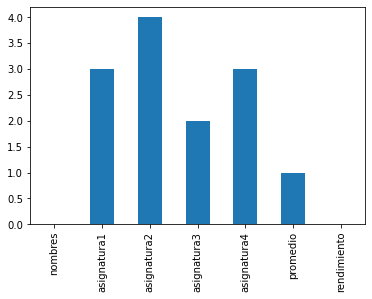

In [191]:
sobresalientes.plot(kind='bar')

In [169]:
estudiantes_df[['asignatura1', 'asignatura2', 'asignatura3', 'asignatura4', 'promedio']].apply(lambda x: (x>=6) & (x<7))

,asignatura1,asignatura2,asignatura3,asignatura4,promedio
0,False,False,True,False,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,True,True
8,False,False,False,False,False
9,False,False,False,False,False


In [171]:
buenos = estudiantes_df[estudiantes_df[['asignatura1', 'asignatura2', 'asignatura3', 'asignatura4', 'promedio']].apply(lambda x: (x>=6) & (x<7))].count()
buenos

nombres        0
asignatura1    1
asignatura2    1
asignatura3    1
asignatura4    1
promedio       2
rendimiento    0
dtype: int64

<AxesSubplot:ylabel='None'>

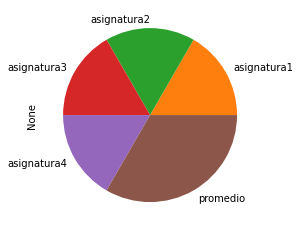

In [193]:
buenos.plot(kind='pie')

<AxesSubplot:>

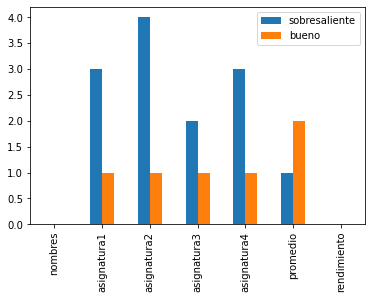

In [194]:
plot_data = pd.DataFrame({'sobresaliente':sobresalientes, 'bueno':buenos})
plot_data.plot(kind='bar')